In [1]:
!pip install kaggle

In [2]:
from google.colab import files
print("Please upload your kaggle.json file")
uploaded = files.upload()

Please upload your kaggle.json file


Saving kaggle.json to kaggle.json


In [3]:
uploaded

{'kaggle.json': b'{"username":"kethavathrahull","key":"a9512b0bd0f34de1e1101eb97f9598d4"}'}

In [4]:
import os
os.makedirs("/root/.kaggle",exist_ok=True)
!cp kaggle.json /root/.kaggle/

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle --version

Kaggle API 1.7.4.5


In [7]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:24<00:00, 245MB/s]
100% 2.70G/2.70G [00:24<00:00, 117MB/s]


In [8]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [9]:
import zipfile

In [10]:
zip_file = 'new-plant-diseases-dataset.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('plantdemo')


In [11]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  plantdemo	sample_data


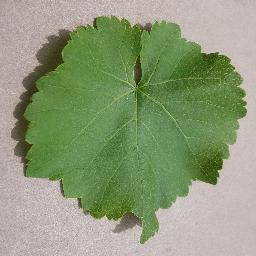

In [12]:
from PIL import Image
import IPython.display as display
image_path='/content/plantdemo/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy/0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103_180deg.JPG'
with open(image_path,'rb') as f:
  display.display(display.Image(data=f.read(),width=300))

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
num_classes=38
model.add(Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    15,745,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,766,950 (60.15 MB)

 Trainable params: 15,766,950 (60.15 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)


In [17]:
val_datagen = ImageDataGenerator(
    rescale=1./255
)


In [18]:
train_dir = '/content/plantdemo/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
val_dir = '/content/plantdemo/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
train_generator = train_datagen.flow_from_directory(
    train_dir
)

validation_generator = val_datagen.flow_from_directory(
    val_dir
)



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_generator,batch_size=16,epochs=4,validation_data=validation_generator,validation_batch_size=16)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1121s 507ms/step - accuracy: 0.4368 - loss: 2.1395 - val_accuracy: 0.7555 - val_loss: 0.7845
Epoch 2/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1104s 503ms/step - accuracy: 0.8157 - loss: 0.6017 - val_accuracy: 0.7680 - val_loss: 0.8261
Epoch 3/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1098s 499ms/step - accuracy: 0.8743 - loss: 0.3974 - val_accuracy: 0.8229 - val_loss: 0.6103
Epoch 4/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1071s 487ms/step - accuracy: 0.9039 - loss: 0.3035 - val_accuracy: 0.9104 - val_loss: 0.2764


In [22]:
from matplotlib import pyplot as plt
test_loss, test_accuracy = model.evaluate(validation_generator)
print  ("Test Accuracy:", test_accuracy)


550/550 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.9103 - loss: 0.2722
Test Accuracy: 0.9104256629943848


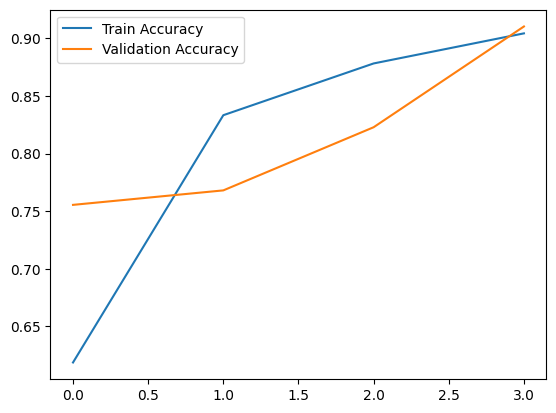

In [23]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()




In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [46]:

img = image.load_img('/content/plantdemo/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Black_rot/02168189-aa75-4284-a7f0-8ca5901ea783___JR_FrgE.S 2948_90deg.JPG', target_size=(256,256))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [47]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print("Predicted class index:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class index: 1


In [48]:
class_labels = {v: k for k, v in train_generator.class_indices.items()}
print("Predicted Disease:", class_labels[predicted_class])

Predicted Disease: Apple___Black_rot


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

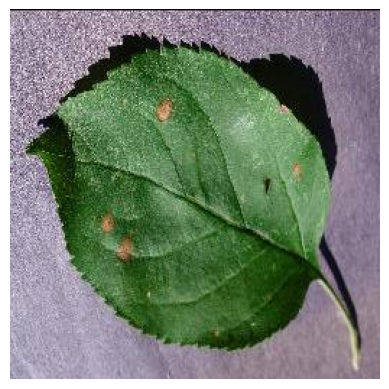

In [51]:
#extra code to check whether predicted disease is ccorrect or not
img = Image.open('/content/plantdemo/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Black_rot/02168189-aa75-4284-a7f0-8ca5901ea783___JR_FrgE.S 2948_90deg.JPG')

plt.imshow(img)
plt.axis('off')

In [54]:
model.save("plant_disease_model.keras")

In [55]:
!ls /content

CropDisease.h5	new-plant-diseases-dataset.zip	plant_disease_model.keras
kaggle.json	plantdemo			sample_data
